<a href="https://colab.research.google.com/github/mk9652064965/Topic-Modeling-on-News-Articles/blob/main/Topic_Modeling_on_News_Articles1__spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
import pandas as pd
import warnings
import spacy
from sklearn.datasets import fetch_20newsgroups
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

Load Dataset

In [6]:
# Dictionary with 'data' as key and each review as an element of list
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

# list of articles
documents = dataset.data

# Dataframe with a column `document` containing all the articles
news_df = pd.DataFrame({'document':documents})

news_df.head()

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


In [7]:
tokenized_doc_spacy = news_df[:100]

In [8]:
tokenized_doc_spacy[:1]

,document
0,Well i'm not sure about the story nad it did s...


Load Spacy

In [9]:
nlp = spacy.load('en')

In [10]:
stopwords = list(STOP_WORDS)

Function to process data

In [11]:
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuation ]
    mytokens = [ word for word in mytokens if len(word) > 3]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [12]:
# Creating a list of documents from the complaints column
list_of_docs = tokenized_doc_spacy['document'].tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [spacy_tokenizer(doc).split() for doc in list_of_docs]

In [13]:
print(doc_clean[:1])

[['sure', 'story', 'biased', 'disagree', 'statement', 'u.s.', 'media', 'ruin', 'israel', 'reputation', 'rediculous', 'u.s.', 'medium', 'israeli', 'medium', 'world', 'live', 'europe', 'realize', 'incidence', 'describe', 'letter', 'occur', 'u.s.', 'medium', 'ignore', 'u.s.', 'subsidize', 'israels', 'existance', 'europeans', 'degree', 'think', 'reason', 'report', 'clearly', 'atrocity', 'shame', 'austria', 'daily', 'report', 'inhuman', 'commit', 'israeli', 'soldier', 'blessing', 'receive', 'government', 'holocaust', 'guilt', 'away', 'look', 'jews', 'treat', 'race', 'power', 'unfortunate']]


Create Corpus using Bag of words

In [14]:
words = corpora.Dictionary(doc_clean)
corpus = [words.doc2bow(doc) for doc in doc_clean]

LDA Modeling

In [15]:
lda_model = LdaModel(corpus=corpus, id2word=words, num_topics=5, random_state=2, update_every=1,\
                                 passes=10, alpha='auto')

In [16]:
print(lda_model.print_topics())

[(0, '0.009*"cache" + 0.006*"work" + 0.006*"mormon" + 0.005*"card" + 0.005*"think" + 0.004*"find" + 0.004*"mary" + 0.004*"keyboard" + 0.004*"good" + 0.004*"believe"'), (1, '0.010*"graphic" + 0.009*"mail" + 0.009*"file" + 0.009*"send" + 0.009*"image" + 0.007*"object" + 0.006*"/pub" + 0.006*"format" + 0.005*"package" + 0.005*"tracer"'), (2, '0.007*"like" + 0.006*"know" + 0.006*"patch" + 0.005*"force" + 0.005*"contact" + 0.005*"year" + 0.005*"hole" + 0.005*"bike" + 0.004*"think" + 0.004*"need"'), (3, '0.008*"israel" + 0.007*"good" + 0.006*"life" + 0.005*"people" + 0.005*"israeli" + 0.005*"know" + 0.005*"time" + 0.005*"like" + 0.004*"adirondack" + 0.004*"government"'), (4, '0.006*"like" + 0.005*"know" + 0.005*"system" + 0.005*"chip" + 0.005*"year" + 0.004*"work" + 0.004*"need" + 0.004*"torrey" + 0.003*"think" + 0.003*"session"')]


Word Could

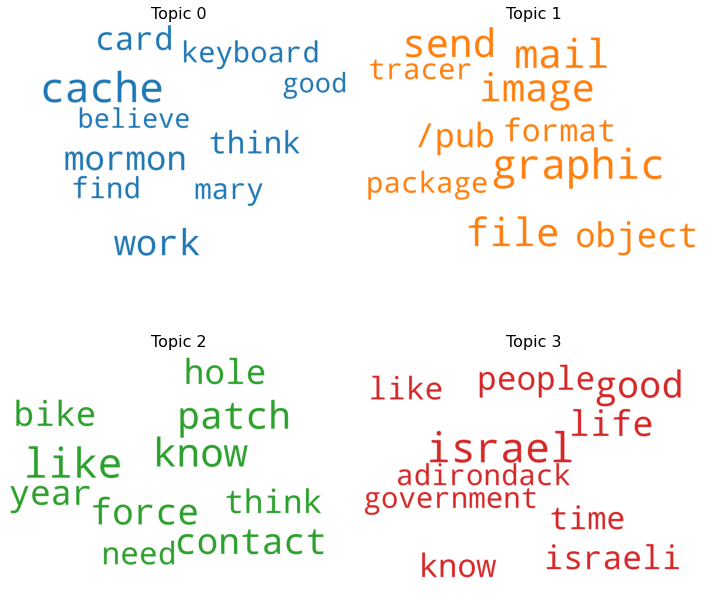

In [17]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()